/tmp/ipython-input-4284258117.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diagnosis", data=data, palette="coolwarm")


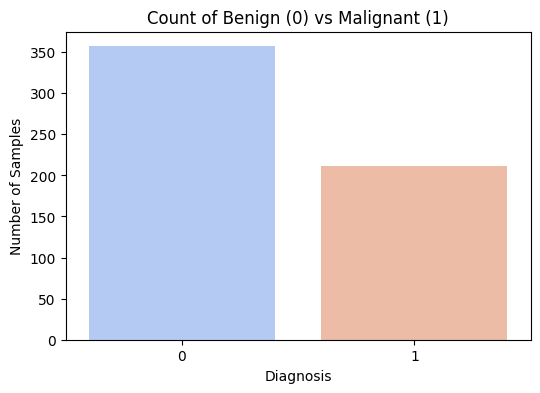

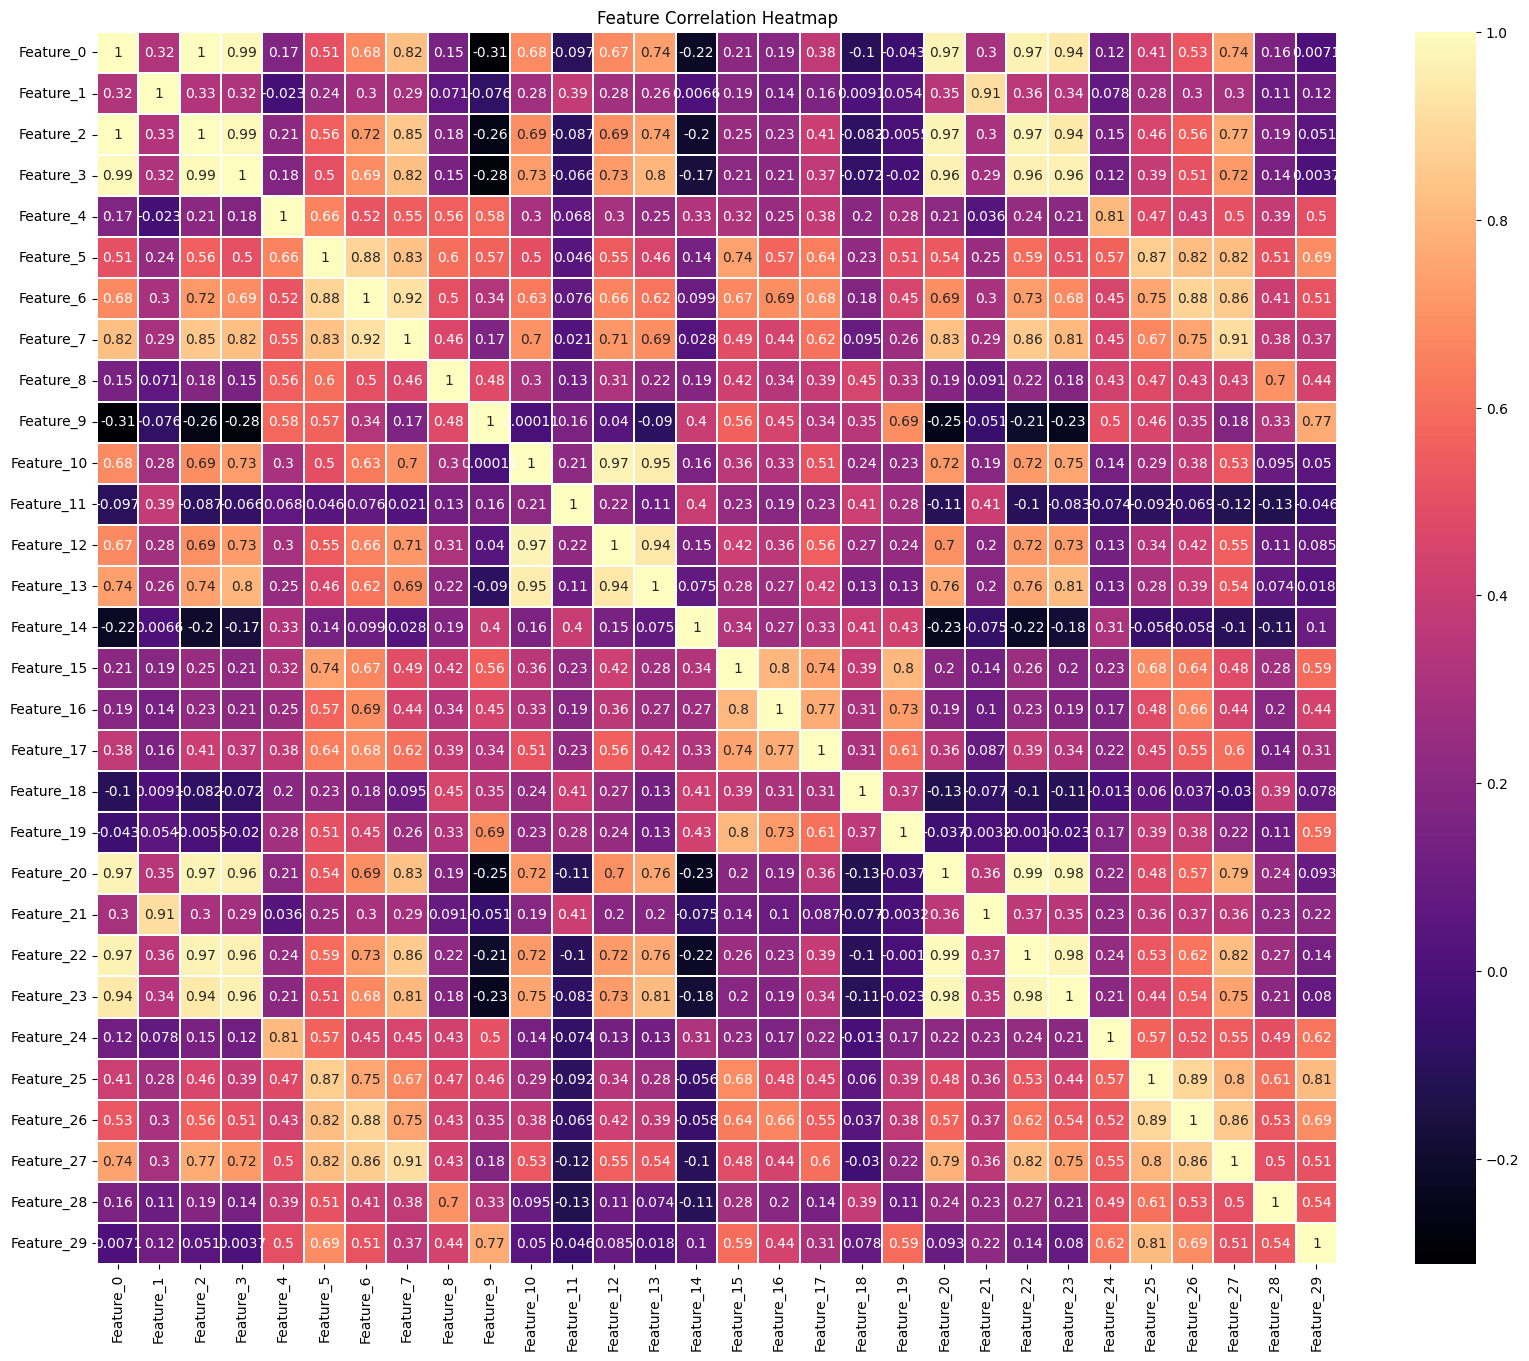


--- Classification Report: KNN ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171


--- Classification Report: SVM ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


--- Performance Metrics Summary ---
Accuracy:       KNN=96.49% | SVM=95.91%
Sensitivity:    KNN=90.62% | SVM=89.06%
Specificity:    KNN=100.00% | SVM=100.00%
Precision:      KNN=100.00% | SVM=100.00%
G-Mean:         KNN=95.20% | SVM=94.37%
FDR:            KNN=0.00% | SVM=0

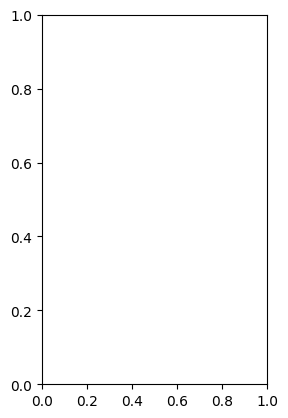

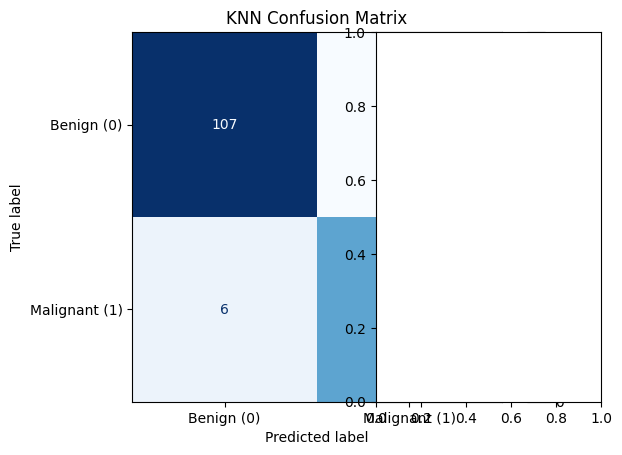

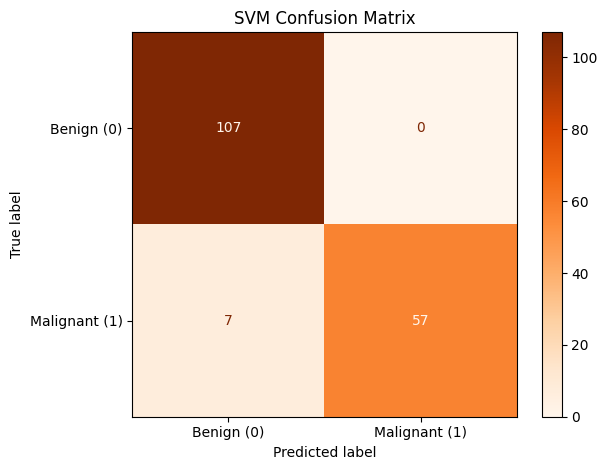

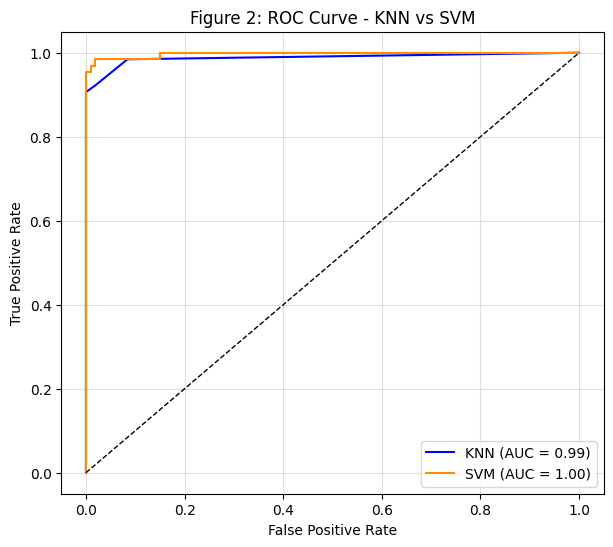

In [4]:
# --- Breast Cancer Classification (KNN vs SVM) ---
# This script trains two models (KNN and SVM) on the Breast Cancer Wisconsin dataset,
# performs basic EDA, evaluates both models using various metrics,
# and visualizes the results with confusion matrices and ROC curves.

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix,
    classification_report, roc_curve, auc, ConfusionMatrixDisplay, matthews_corrcoef
)

# 1. Load and inspect the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None)

# Assign meaningful column names
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(30)]
data.columns = columns

# Drop the ID column since it doesn’t contribute to prediction
data.drop("ID", axis=1, inplace=True)

# Encode target labels: M → 1 (malignant), B → 0 (benign)
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["Diagnosis"])

# 2. Basic Exploratory Data Analysis

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Diagnosis", data=data, palette="coolwarm")
plt.title("Count of Benign (0) vs Malignant (1)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Samples")
plt.show()

# Check correlation between features
plt.figure(figsize=(20, 16))
corr = data.drop("Diagnosis", axis=1).corr()
sns.heatmap(corr, cmap="magma", linewidths=0.3, annot = True)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Prepare data for training


# Separate input features and target variable
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the models

# K-Nearest Neighbors (default k=5)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Support Vector Machine (default RBF kernel)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# 6. Evaluate model performance
print("\n--- Classification Report: KNN ---")
print(classification_report(y_test, y_pred_knn))

print("\n--- Classification Report: SVM ---")
print(classification_report(y_test, y_pred_svm))

# Confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Extract values for manual calculations
tn1, fp1, fn1, tp1 = cm_knn.ravel()
tn2, fp2, fn2, tp2 = cm_svm.ravel()

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Sensitivity (Recall for positive class)
sen_knn = recall_score(y_test, y_pred_knn)
sen_svm = recall_score(y_test, y_pred_svm)

# Precision
prec_knn = precision_score(y_test, y_pred_knn)
prec_svm = precision_score(y_test, y_pred_svm)

# Specificity
spec_knn = tn1 / (tn1 + fp1)
spec_svm = tn2 / (tn2 + fp2)

# Geometric Mean
gmean_knn = np.sqrt(sen_knn * spec_knn)
gmean_svm = np.sqrt(sen_svm * spec_svm)

# False Discovery Rate (FDR)
fdr_knn = fp1 / (fp1 + tp1)
fdr_svm = fp2 / (fp2 + tp2)

# False Omission Rate (FOR)
for_knn = fn1 / (fn1 + tn1)
for_svm = fn2 / (fn2 + tn2)

# Matthews Correlation Coefficient (MCC)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

# Print results neatly
print("\n--- Performance Metrics Summary ---")
print(f"Accuracy:       KNN={acc_knn*100:.2f}% | SVM={acc_svm*100:.2f}%")
print(f"Sensitivity:    KNN={sen_knn*100:.2f}% | SVM={sen_svm*100:.2f}%")
print(f"Specificity:    KNN={spec_knn*100:.2f}% | SVM={spec_svm*100:.2f}%")
print(f"Precision:      KNN={prec_knn*100:.2f}% | SVM={prec_svm*100:.2f}%")
print(f"G-Mean:         KNN={gmean_knn*100:.2f}% | SVM={gmean_svm*100:.2f}%")
print(f"FDR:            KNN={fdr_knn*100:.2f}% | SVM={fdr_svm*100:.2f}%")
print(f"FOR:            KNN={for_knn*100:.2f}% | SVM={for_svm*100:.2f}%")
print(f"MCC:            KNN={mcc_knn:.3f} | SVM={mcc_svm:.3f}")

plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(cm_knn, display_labels=["Benign (0)", "Malignant (1)"]).plot(cmap="Blues", values_format="d")
plt.title("KNN Confusion Matrix")

plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(cm_svm, display_labels=["Benign (0)", "Malignant (1)"]).plot(cmap="Oranges", values_format="d")
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()

# 8. ROC Curve Comparison
# Enable probability outputs for ROC
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
svm_prob_model = SVC(probability=True)
svm_prob_model.fit(X_train_scaled, y_train)
svm_probs = svm_prob_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC metrics
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

auc_knn = auc(fpr_knn, tpr_knn)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(7, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color="blue")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 2: ROC Curve - KNN vs SVM")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()
